<a href="https://colab.research.google.com/github/Viktoria574/ML/blob/main/TIMO_pract4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_recall_curve, roc_auc_score, auc, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('happydata.csv')

# Удаление повторяющихся строк
data = data.drop_duplicates()

print(data.head())
print(data.columns)

   infoavail  housecost  schoolquality  policetrust  streetquality  ëvents  \
0          3          3              3            4              2       4   
1          3          2              3            5              4       3   
2          5          3              3            3              3       5   
3          5          4              3            3              3       5   
5          5          5              3            5              5       5   

   happy  
0      0  
1      0  
2      1  
3      0  
5      1  
Index(['infoavail', 'housecost', 'schoolquality', 'policetrust',
       'streetquality', 'ëvents', 'happy'],
      dtype='object')


In [ ]:
x = data.drop("happy", axis=1)
y = data["happy"]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Определение параметров для поиска
param_grid_log_reg = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Создание модели логистической регрессии
log_reg = LogisticRegression()

# Поиск по сетке
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy')
grid_search_log_reg.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры Logistic Regression: ", grid_search_log_reg.best_params_)
print("Лучшая accuracy: ", grid_search_log_reg.best_score_)

# Обучение модели с лучшими параметрами
best_log_reg = grid_search_log_reg.best_estimator_
best_log_reg.fit(X_train, y_train)

Лучшие параметры Logistic Regression:  {'C': 1, 'solver': 'lbfgs'}
Лучшая accuracy:  0.5758169934640524


LogisticRegression(C=1)

In [ ]:
# Определение параметров для поиска
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Создание модели KNN
knn = KNeighborsClassifier()

# Поиск по сетке
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры KNN: ", grid_search_knn.best_params_)
print("Лучшая accuracy: ", grid_search_knn.best_score_)

# Обучение модели с лучшими параметрами
best_knn = grid_search_knn.best_estimator_
best_knn.fit(X_train, y_train)


Лучшие параметры KNN:  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Лучшая accuracy:  0.5960784313725491


KNeighborsClassifier(metric='manhattan')

In [ ]:

# Определение параметров для поиска
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Создание модели SVM
svm = SVC(probability=True)

# Поиск по сетке
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры: ", grid_search.best_params_)
print("Лучшая accuracy: ", grid_search.best_score_)

# Обучение модели с лучшими параметрами
best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)

Лучшие параметры:  {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Лучшая accuracy:  0.6450980392156863


SVC(C=100, kernel='linear', probability=True)

In [ ]:
# Функция для оценки модели
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)

    print(f"Accuracy: {accuracy}")
    print(f"F1-Score: {f1}")
    print(f"ROC-AUC: {roc_auc}")
    print(f"PR-AUC: {pr_auc}")
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix")
    print(pd.DataFrame(cm, columns=[f'Predicted {i}' for i in np.unique(y_test)], index=[f'Actual {i}' for i in np.unique(y_test)]))

    return accuracy, f1, cm, roc_auc, pr_auc

# Оценка моделей
print("Logistic Regression with best parameters:")
evaluate_model(best_log_reg, X_test, y_test)

print("\nK-Nearest Neighbors with best parameters:")
evaluate_model(best_knn, X_test, y_test)

print("\nSupport Vector Machine with best parameters:")
evaluate_model(best_svm, X_test, y_test)

Logistic Regression with best parameters:
Accuracy: 0.631578947368421
F1-Score: 0.6111111111111112
ROC-AUC: 0.6731301939058172
PR-AUC: 0.6828444371077873
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0           13            6
Actual 1            8           11

K-Nearest Neighbors with best parameters:
Accuracy: 0.5
F1-Score: 0.5128205128205128
ROC-AUC: 0.5304709141274239
PR-AUC: 0.6187848653892797
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0            9           10
Actual 1            9           10

Support Vector Machine with best parameters:
Accuracy: 0.6578947368421053
F1-Score: 0.6976744186046512
ROC-AUC: 0.667590027700831
PR-AUC: 0.6071030141033588
Confusion Matrix
          Predicted 0  Predicted 1
Actual 0           10            9
Actual 1            4           15


(0.6578947368421053,
 0.6976744186046512,
 array([[10,  9],
        [ 4, 15]]),
 0.667590027700831,
 0.6071030141033588)

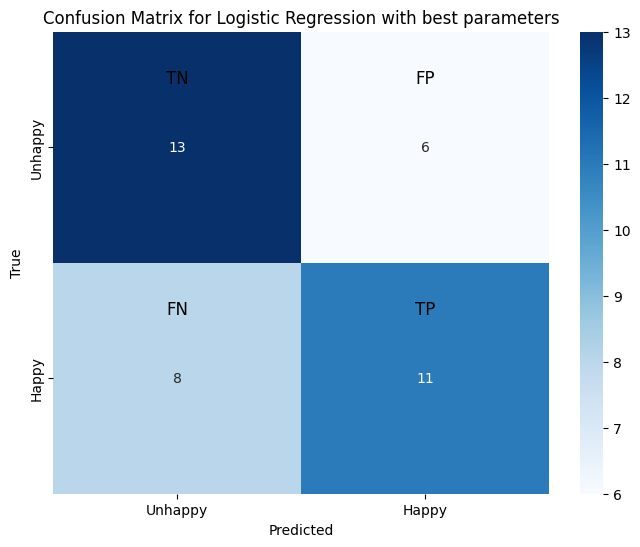

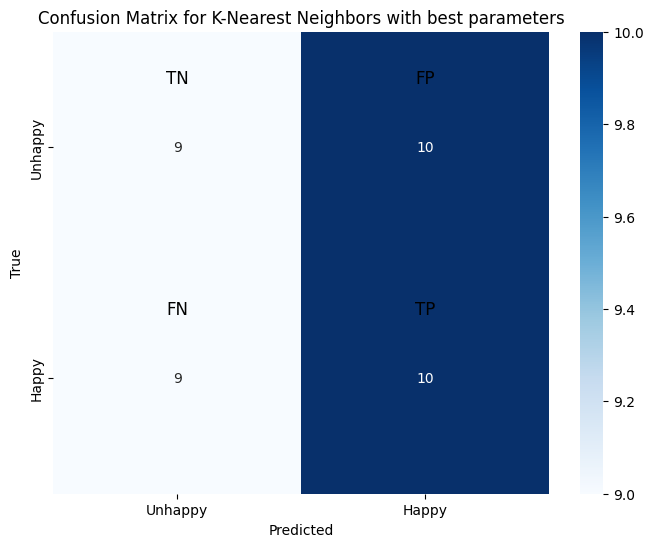

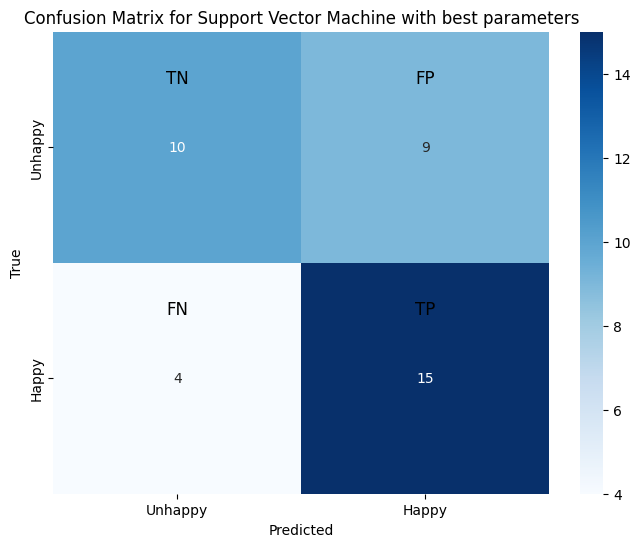

In [ ]:
# Функция для визуализации матрицы ошибок с подписями
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unhappy', 'Happy'], yticklabels=['Unhappy', 'Happy'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')

    # Добавление подписей для TN, TP, FP, FN
    plt.text(0.5, 0.2, 'TN', ha='center', va='center', color='black', fontsize=12)
    plt.text(1.5, 0.2, 'FP', ha='center', va='center', color='black', fontsize=12)
    plt.text(0.5, 1.2, 'FN', ha='center', va='center', color='black', fontsize=12)
    plt.text(1.5, 1.2, 'TP', ha='center', va='center', color='black', fontsize=12)

    plt.show()

# Визуализация матрицы ошибок для каждой модели
models = [(best_log_reg, 'Logistic Regression with best parameters'), (best_knn, 'K-Nearest Neighbors with best parameters'), (best_svm, 'Support Vector Machine with best parameters')]

for model, model_name in models:
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, model_name)


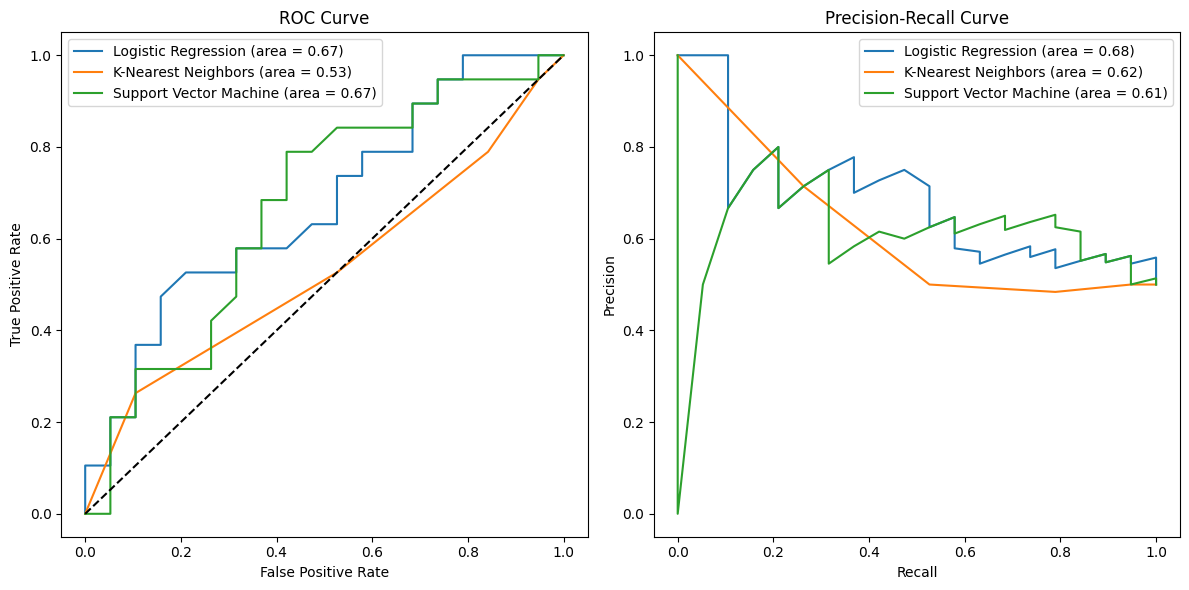

In [ ]:
# Функция для визуализации ROC и PR кривых
def plot_roc_pr_curves(models, X_test, y_test):
    plt.figure(figsize=(12, 6))

    # ROC Curve
    plt.subplot(1, 2, 1)
    for model, model_name in models:
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = roc_auc_score(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{model_name} (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')

    # PR Curve
    plt.subplot(1, 2, 2)
    for model, model_name in models:
        y_prob = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_prob)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f"{model_name} (area = {pr_auc:.2f})")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

# Визуализация ROC и PR кривых
models = [(best_log_reg, 'Logistic Regression'), (best_knn, 'K-Nearest Neighbors'), (best_svm, 'Support Vector Machine')]
plot_roc_pr_curves(models, X_test, y_test)


In [ ]:
# Функция для оценки модели и поиска оптимального порога
def evaluate_model_and_find_threshold(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]

    # PR-кривая и F1-метрика
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    f1_scores = f1_score(y_test, y_pred)
    best_f1_threshold = thresholds[np.argmax(f1_scores)]
    best_f1_score = np.max(f1_scores)

    # Построение графика PR-кривой
    # plt.figure(figsize=(8, 6))
    # plt.plot(recall, precision, marker='.', label='PR curve')
    # plt.scatter(recall[np.argmax(f1_scores)], precision[np.argmax(f1_scores)], color='red', label=f'Optimal threshold: {best_f1_threshold:.2f}')
    # plt.xlabel('Recall')
    # plt.ylabel('Precision')
    # plt.title(f'Precision-Recall Curve')
    # plt.legend()
    # plt.grid(True)
    # plt.show()

    # ROC-кривая и G-mean
    fpr, tpr, thresholds_roc = roc_curve(y_test, y_prob)
    g_means = np.sqrt(tpr * (1 - fpr))
    best_g_mean_threshold = thresholds_roc[np.argmax(g_means)]
    best_g_mean_score = np.max(g_means)

    roc_auc = auc(fpr, tpr)

    # Построение графика ROC-кривой
    # plt.figure(figsize=(8, 6))
    # plt.plot(fpr, tpr, marker='.', label=f'ROC curve (area = {roc_auc:.2f})')
    # plt.plot([0, 1], [0, 1], linestyle='--', label='Random Chance')
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.title(f'ROC Curve')
    # plt.legend()
    # plt.grid(True)
    # plt.show()

    print(f"Best F1 Threshold: {best_f1_threshold}, Best F1 Score: {best_f1_score}")
    print(f"Best G-mean Threshold: {best_g_mean_threshold}, Best G-mean Score: {best_g_mean_score}")

    return best_f1_threshold, best_g_mean_threshold

# Оценка моделей и поиск оптимального порога
print("Logistic Regression:")
best_f1_threshold_log_reg, best_g_mean_threshold_log_reg = evaluate_model_and_find_threshold(best_log_reg, X_test, y_test)

print("\nK-Nearest Neighbors:")
best_f1_threshold_knn, best_g_mean_threshold_knn = evaluate_model_and_find_threshold(best_knn, X_test, y_test)

print("\nSupport Vector Machine:")
best_f1_threshold_svm, best_g_mean_threshold_svm = evaluate_model_and_find_threshold(best_svm, X_test, y_test)


Logistic Regression:
Best F1 Threshold: 0.040938063522700116, Best F1 Score: 0.6976744186046512
Best G-mean Threshold: 0.5740986377914452, Best G-mean Score: 0.64460256389031

K-Nearest Neighbors:
Best F1 Threshold: 0.0, Best F1 Score: 0.6976744186046512
Best G-mean Threshold: 0.6, Best G-mean Score: 0.49930699897395464

Support Vector Machine:
Best F1 Threshold: 0.344265145508542, Best F1 Score: 0.6976744186046512
Best G-mean Threshold: 0.507293820094615, Best G-mean Score: 0.6760648725613226
